In [ ]:
import numpy as np
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt
import time


In [ ]:
from keras.datasets import cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
required_classes = [1, 3, 5, 9]

In [ ]:
train_index = [i for i, label in enumerate(y_train) if label in required_classes]
test_index = [i for i, label in enumerate(y_test) if label in required_classes]
x_train = x_train[train_index]
y_train = y_train[train_index]
x_test = x_test[test_index]
y_test = y_test[test_index]

In [ ]:
y_train[(y_train == 1)] = 0   # automobile
y_train[(y_train == 3)] = 1   # cat
y_train[(y_train == 5)] = 2   # dog
y_train[(y_train == 9)] = 3   # truck

y_test[(y_test == 1)] = 0   # automobile
y_test[(y_test == 3)] = 1   # cat
y_test[(y_test == 5)] = 2   # dog
y_test[(y_test == 9)] = 3   # truck

In [ ]:
# one hot encode target values
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
x_train_filtered = x_train / 255.0
x_test_filtered = x_test / 255.0

In [ ]:
model= Sequential()
model.add(Conv2D(16,(3,3), input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(4))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 16)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 32)         

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
print(x_train_filtered.shape)
print(y_train.shape)
print(x_test_filtered.shape)
print(y_test.shape)

(20000, 32, 32, 3)
(20000, 4)
(4000, 32, 32, 3)
(4000, 4)


In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 32, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
625/625 [==============================] - 24s 37ms/step - loss: 8.1032 - accuracy: 0.2477 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 2/50
625/625 [==============================] - 22s 35ms/step - loss: 8.1292 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 3/50
625/625 [==============================] - 21s 34ms/step - loss: 8.1437 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 4/50
625/625 [==============================] - 24s 38ms/step - loss: 8.1042 - accuracy: 0.2499 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 5/50
625/625 [==============================] - 21s 34ms/step - loss: 8.1711 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 6/50
625/625 [==============================] - 21s 34ms/step - loss: 8.0873 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 7/50
625/625 [==============================] - 22s 36ms/step - loss: 8.0719 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy:

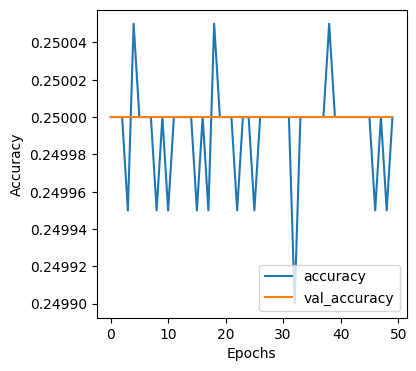

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc = 'lower right');



In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 10ms/step - loss: 8.0590 - accuracy: 0.2500


[8.05904769897461, 0.25]

**batch_size= 64**

In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 64, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
313/313 [==============================] - 24s 74ms/step - loss: 8.0752 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 2/50
313/313 [==============================] - 19s 62ms/step - loss: 8.1477 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 3/50
313/313 [==============================] - 21s 67ms/step - loss: 8.1638 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 4/50
313/313 [==============================] - 22s 69ms/step - loss: 8.1050 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 5/50
313/313 [==============================] - 20s 63ms/step - loss: 8.1590 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 6/50
313/313 [==============================] - 21s 67ms/step - loss: 8.0679 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 7/50
313/313 [==============================] - 20s 63ms/step - loss: 8.1034 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy:

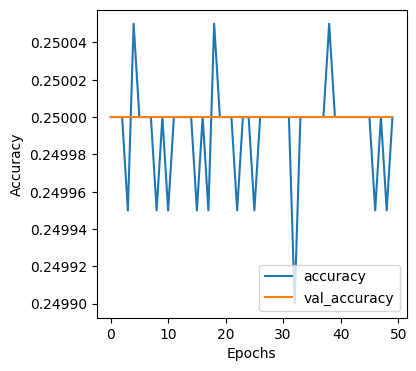

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc = 'lower right');


In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 10ms/step - loss: 8.0590 - accuracy: 0.2500


[8.05904769897461, 0.25]

**batch_size= 128**

In [ ]:
start = time.time()

history = model.fit(x_train_filtered , y_train, epochs=50 , batch_size = 128, validation_data=(x_test_filtered, y_test))
model.save('cifar.h5')

end = time.time()
print("Run time [s]: ",end-start)

Epoch 1/50
157/157 [==============================] - 24s 150ms/step - loss: 8.1018 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 2/50
157/157 [==============================] - 18s 116ms/step - loss: 8.1791 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 3/50
157/157 [==============================] - 18s 115ms/step - loss: 8.1396 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 4/50
157/157 [==============================] - 19s 119ms/step - loss: 8.1163 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 5/50
157/157 [==============================] - 18s 113ms/step - loss: 8.1147 - accuracy: 0.2501 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 6/50
157/157 [==============================] - 19s 122ms/step - loss: 8.0744 - accuracy: 0.2500 - val_loss: 8.0590 - val_accuracy: 0.2500
Epoch 7/50
157/157 [==============================] - 18s 112ms/step - loss: 8.1082 - accuracy: 0.2500 - val_loss: 8.0590 - val_ac

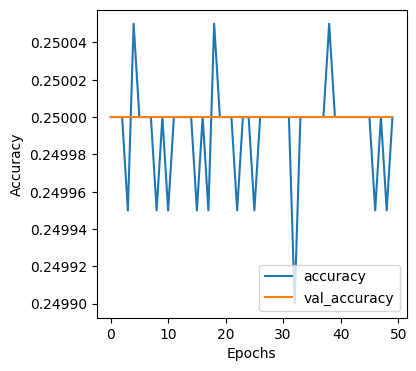

In [ ]:
plt.figure(figsize=(4,4))

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
# plt.ylim([0.5,1])
plt.legend(loc = 'lower right');

In [ ]:
model.evaluate(x_test, y_test)

125/125 [==============================] - 1s 10ms/step - loss: 8.0590 - accuracy: 0.2500


[8.05904769897461, 0.25]